In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/angkasatech/ds/37146328bc5814f4e7a0adb739e6574def32b6dc/banking_train.csv', delimiter=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
#the dataframe has 45211 entries and 17 columns
#there are 17 columns with 7 int64 dtype and 10 object dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Pre Processing

## Duplicate

In [6]:
df.duplicated(subset='age balance job marital education default housing loan'.split()).sum()

4163

In [7]:
df.drop_duplicates(subset='age balance job marital education default housing loan'.split(), inplace=True)

In [8]:
df.duplicated(subset='age balance job marital education default housing loan'.split()).sum()

0

## Replace Unknown with mode value for job, education, and contact columns

In [9]:
#lakukan imputasi/replace nilai modus pada kolom job, education, dan contact yang memiliki nilai 'unknown'
col='job education contact'.split()
#replace kolom job
for i in col:
  df[i]=df[i].replace(['unknown'],df[i].mode()[0])

*Untuk kolom poutcome, nilai 'unknown' dibiarkan saja karena nantinya kolom poutcome akan didrop karena dinilai memiliki potensi redundant dengan kolom pdays*

## Replace minus value with zero in balance column

In [10]:
df['balance'][df['balance']<0]=0

## Outliers

In [11]:
#handle with z score
from scipy import stats
import numpy as np

In [12]:
nums_skew = ['age','balance','duration','campaign','pdays','previous']

In [13]:
nums = ['age','balance','day','duration','campaign','pdays','previous']

In [14]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in nums:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 41048
Jumlah baris setelah memfilter outlier: 36206


## Data Transformation

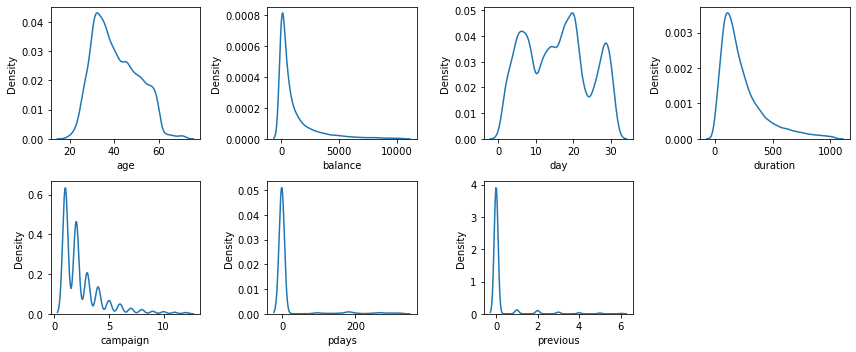

In [15]:
features = nums
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=(df[features[i]]))
    plt.xlabel(features[i])
    plt.tight_layout()

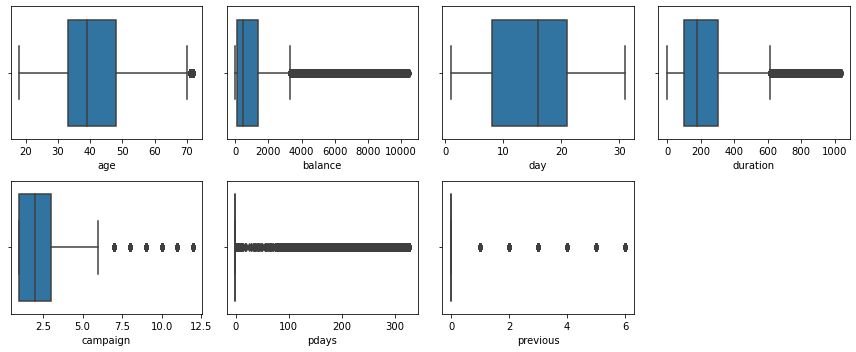

In [16]:
features = nums
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(2, 4, i+1)
    sns.boxplot(x=(df[features[i]]))
    plt.xlabel(features[i])
    plt.tight_layout()

In [17]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [18]:
# kita tranformasi
df['age_norm'] = MinMaxScaler().fit_transform(df['age'].values.reshape(len(df), 1))
df['balance_std'] = StandardScaler().fit_transform(df['balance'].values.reshape(len(df), 1))
df['day_norm'] = MinMaxScaler().fit_transform(df['day'].values.reshape(len(df), 1))
df['duration_std'] = StandardScaler().fit_transform(df['duration'].values.reshape(len(df), 1))
df['campaign_std'] = StandardScaler().fit_transform(df['campaign'].values.reshape(len(df), 1))
df['pdays_std'] = StandardScaler().fit_transform(df['pdays'].values.reshape(len(df), 1))
df['previous_std'] = StandardScaler().fit_transform(df['previous'].values.reshape(len(df), 1))

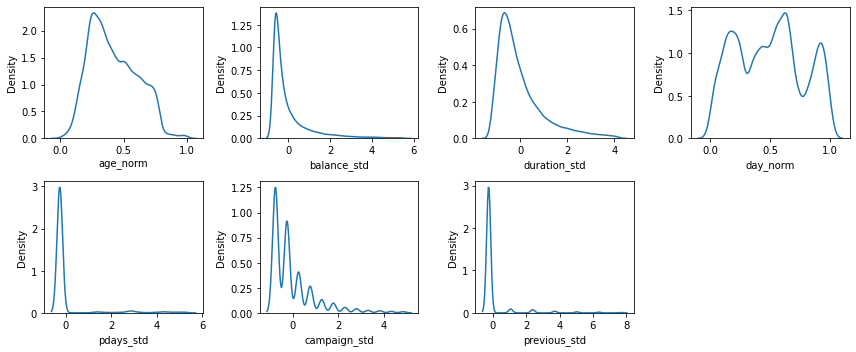

In [19]:
nums_trans_check = ['age_norm',	'balance_std',	'duration_std','day_norm', 'pdays_std', 'campaign_std', 'previous_std']
features = nums_trans_check
plt.figure(figsize=(12, 5))
for i in range(0, len(features)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=(df[features[i]]))
    plt.xlabel(features[i])
    plt.tight_layout()

In [20]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,age_norm,balance_std,day_norm,duration_std,campaign_std,pdays_std,previous_std
count,36206.000000,36206.000000,36206.000000,36206.000000,36206.000000,36206.000000,36206.000000,36206.000000,3.620600e+04,36206.000000,3.620600e+04,3.620600e+04,3.620600e+04,3.620600e+04
mean,40.698752,1124.963597,15.845385,236.377203,2.495553,14.971193,0.189554,0.420347,4.226868e-15,0.494846,1.267836e-16,9.420153e-16,-5.724441e-14,-1.963578e-14
std,10.076242,1699.870716,8.368657,192.631082,1.973312,58.446110,0.757453,0.186597,1.000014e+00,0.278955,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,18.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,-6.618028e-01,0.000000,-1.227115e+00,-7.579005e-01,-2.732673e-01,-2.502555e-01
25%,33.000000,84.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.277778,-6.123866e-01,0.233333,-6.924067e-01,-7.579005e-01,-2.732673e-01,-2.502555e-01
50%,39.000000,449.000000,16.000000,177.000000,2.000000,-1.000000,0.000000,0.388889,-3.976614e-01,0.500000,-3.082474e-01,-2.511312e-01,-2.732673e-01,-2.502555e-01
75%,48.000000,1364.000000,21.000000,307.000000,3.000000,-1.000000,0.000000,0.555556,1.406223e-01,0.666667,3.666271e-01,2.556381e-01,-2.732673e-01,-2.502555e-01
max,72.000000,10500.000000,31.000000,1038.000000,12.000000,327.000000,6.000000,1.000000,5.515223e+00,1.000000,4.161498e+00,4.816562e+00,5.338817e+00,7.671135e+00


## Feature Encoding

### Label Encoding

In [21]:
mapping_default = {
    'no' : 0,
    'yes' : 1
}

mapping_housing = {
    'no' : 0,
    'yes' : 1,
}

mapping_loan = {
    'no' : 0,
    'yes' : 1
}

mapping_y = {
    'no' : 0,
    'yes' : 1
}

df['default'] = df['default'].map(mapping_default)
df['housing'] = df['housing'].map(mapping_housing)
df['loan'] = df['loan'].map(mapping_loan)
df['y'] = df['y'].map(mapping_y)

### One Hot Encoding

In [22]:
for cat in ['job', 'marital','education','contact','month','poutcome']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36206 entries, 0 to 45209
Data columns (total 59 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  36206 non-null  int64  
 1   job                  36206 non-null  object 
 2   marital              36206 non-null  object 
 3   education            36206 non-null  object 
 4   default              36206 non-null  int64  
 5   balance              36206 non-null  int64  
 6   housing              36206 non-null  int64  
 7   loan                 36206 non-null  int64  
 8   contact              36206 non-null  object 
 9   day                  36206 non-null  int64  
 10  month                36206 non-null  object 
 11  duration             36206 non-null  int64  
 12  campaign             36206 non-null  int64  
 13  pdays                36206 non-null  int64  
 14  previous             36206 non-null  int64  
 15  poutcome             36206 non-null 

In [24]:
df.loc[:,'housing loan contact_cellular contact_telephone'.split()]

,housing,loan,contact_cellular,contact_telephone
0,1,0,1,0
1,1,0,1,0
2,1,1,1,0
3,1,0,1,0
4,0,0,1,0
...,...,...,...,...
45203,0,0,1,0
45205,0,1,1,0
45206,0,0,1,0
45207,0,0,1,0


## Balancing Dataset

In [25]:
df['y'].value_counts()

0    32961
1     3245
Name: y, dtype: int64

In [26]:
X = df[[col for col in df.columns if (str(df[col].dtype) != 'object') and col not in ['y']]]
y = df['y'].values
print(X.shape)
print(y.shape)

(36206, 52)
(36206,)


In [27]:
from imblearn import under_sampling, over_sampling
X_under, y_under = under_sampling.RandomUnderSampler(0.5).fit_resample(X, y)
X_over, y_over = over_sampling.RandomOverSampler(sampling_strategy=0.5, random_state=1).fit_resample(X, y)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(0.5).fit_resample(X, y)

In [28]:
print('Original')
print(pd.Series(y).value_counts())
print('Undersampling')
print(pd.Series(y_under).value_counts())
print('Oversampling')
print(pd.Series(y_over).value_counts())
print('oversampling Smote')
print(pd.Series(y_over_SMOTE).value_counts())

Original
0    32961
1     3245
dtype: int64
Undersampling
0    6490
1    3245
dtype: int64
Oversampling
0    32961
1    16480
dtype: int64
oversampling Smote
0    32961
1    16480
dtype: int64


# Modelling

In [29]:
df_after_preprocessed=X_over_SMOTE
df_after_preprocessed

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49436,30,0,180,1,0,18,611,1,-1,0,...,0,0,0,0,0,0,0,0,0,1
49437,29,0,358,0,0,15,436,1,-1,0,...,0,0,0,0,0,0,0,0,0,1
49438,29,0,541,0,0,25,414,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
49439,29,0,163,0,0,4,250,1,-1,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
df_after_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49441 entries, 0 to 49440
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  49441 non-null  int64  
 1   default              49441 non-null  int64  
 2   balance              49441 non-null  int64  
 3   housing              49441 non-null  int64  
 4   loan                 49441 non-null  int64  
 5   day                  49441 non-null  int64  
 6   duration             49441 non-null  int64  
 7   campaign             49441 non-null  int64  
 8   pdays                49441 non-null  int64  
 9   previous             49441 non-null  int64  
 10  age_norm             49441 non-null  float64
 11  balance_std          49441 non-null  float64
 12  day_norm             49441 non-null  float64
 13  duration_std         49441 non-null  float64
 14  campaign_std         49441 non-null  float64
 15  pdays_std            49441 non-null 

In [31]:
df_after_preprocessed['y']=y_over_SMOTE.tolist()

In [32]:
df_after_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49441 entries, 0 to 49440
Data columns (total 53 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  49441 non-null  int64  
 1   default              49441 non-null  int64  
 2   balance              49441 non-null  int64  
 3   housing              49441 non-null  int64  
 4   loan                 49441 non-null  int64  
 5   day                  49441 non-null  int64  
 6   duration             49441 non-null  int64  
 7   campaign             49441 non-null  int64  
 8   pdays                49441 non-null  int64  
 9   previous             49441 non-null  int64  
 10  age_norm             49441 non-null  float64
 11  balance_std          49441 non-null  float64
 12  day_norm             49441 non-null  float64
 13  duration_std         49441 non-null  float64
 14  campaign_std         49441 non-null  float64
 15  pdays_std            49441 non-null 

In [33]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
def eval_classification(model, xtrain, ytrain, xtest, ytest):
    #eval test model
    ypred = model.predict(xtest)
    
    #Get the confusion matrix
    cf_matrix = confusion_matrix(ytest, ypred)
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues', cbar=False)
    
    #calculate each parameter for test model
    print('eval test model')
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, ypred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, ypred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, ypred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, ypred))
    
    y_pred_proba = model.predict_proba(xtest)
    print("AUC: %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))
    
    #eval train model
    ypred_train = model.predict(xtrain)
    print('eval train model')
    print("Accuracy (Train Set): %.2f" % accuracy_score(ytrain, ypred_train))
    print("Precision (Train Set): %.2f" % precision_score(ytrain, ypred_train))
    print("Recall (Train Set): %.2f" % recall_score(ytrain, ypred_train))
    print("F1-Score (Train Set): %.2f" % f1_score(ytrain, ypred_train))
    
    y_pred_proba_train = model.predict_proba(xtrain)
    print("AUC: %.2f" % roc_auc_score(ytrain, y_pred_proba_train[:, 1]))

## Percobaan 1

*Kombinasi Column: age, marital_divorced, marital_married, marital_single, contact_cellular, contact_telephone, balance, default, housing, loan,duration, campaign*

### Split Feature and Target

In [35]:
#feature
X=df_after_preprocessed['age marital_divorced marital_married marital_single contact_cellular contact_telephone balance default housing loan duration campaign'.split()]
#target
y=df_after_preprocessed['y']

In [36]:
#Splitting the data into Train and Test 7:3
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 45)

### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=45)
model.fit(X_train, y_train)

LogisticRegression(random_state=45)

### Prediction

In [38]:
#test prediction
y_pred = model.predict(X_test)

In [39]:
#train prediction
y_pred_train = model.predict(X_train)

### Evaluation

eval test model
Accuracy (Test Set): 0.87
Precision (Test Set): 0.84
Recall (Test Set): 0.74
F1-Score (Test Set): 0.79
AUC: 0.93
eval train model
Accuracy (Train Set): 0.86
Precision (Train Set): 0.84
Recall (Train Set): 0.73
F1-Score (Train Set): 0.78
AUC: 0.93


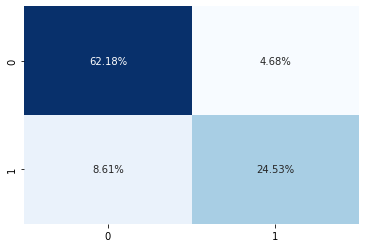

In [40]:
eval_classification(model, X_train, y_train, X_test, y_test)

### Tuning Hyperparameter

eval test model
Accuracy (Test Set): 0.87
Precision (Test Set): 0.88
Recall (Test Set): 0.72
F1-Score (Test Set): 0.79
AUC: 0.94
eval train model
Accuracy (Train Set): 0.87
Precision (Train Set): 0.87
Recall (Train Set): 0.71
F1-Score (Train Set): 0.78
AUC: 0.94


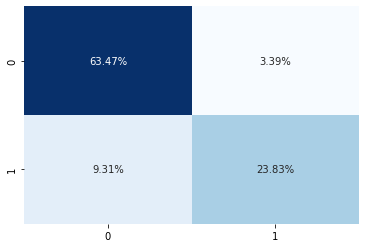

In [41]:
from sklearn.model_selection import RandomizedSearchCV
#hyperparameter tuning using randomized search

#penalty
penalty = ['l2','l1','elasticnet']
#C
C = [float(x) for x in np.linspace(0.01, 10, num=100)]
#max_iter
max_iter = [int(x) for x in np.linspace(250, 750, num=100)]

hyperparams = dict(penalty=penalty, C=C, max_iter=max_iter)

lr = LogisticRegression(random_state=45)
rs = RandomizedSearchCV(lr, hyperparams, cv=5, scoring='precision', random_state=45)
rs.fit(X_train, y_train)
eval_classification(rs, X_train, y_train, X_test, y_test)

In [42]:
print('Train score: ' + str(rs.score(X_train, y_train)))
print('Test score:' + str(rs.score(X_test, y_test)))

Train score: 0.8699084306915061
Test score:0.8754333828628034


In [43]:
rs.best_estimator_.get_params()

{'C': 2.129090909090909,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 684,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 45,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [45]:
c=rs.best_estimator_.get_params()['C']
maxiter=rs.best_estimator_.get_params()['max_iter']
maxiter

684

eval test model
Accuracy (Test Set): 0.87
Precision (Test Set): 0.88
Recall (Test Set): 0.72
F1-Score (Test Set): 0.79
AUC: 0.94
eval train model
Accuracy (Train Set): 0.87
Precision (Train Set): 0.87
Recall (Train Set): 0.71
F1-Score (Train Set): 0.78
AUC: 0.94


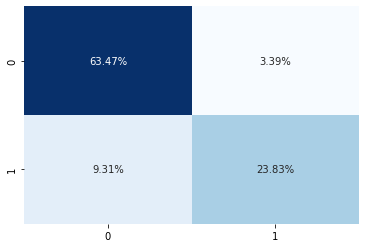

In [46]:
lr = LogisticRegression(random_state=45, C=c, max_iter=maxiter)
lr.fit(X_train, y_train)
eval_classification(lr, X_train, y_train, X_test, y_test)

In [48]:
list(X.columns)

['age',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'contact_cellular',
 'contact_telephone',
 'balance',
 'default',
 'housing',
 'loan',
 'duration',
 'campaign']

In [49]:
w=lr.coef_[0]
w

array([-6.30198281e-03, -6.84064455e+00, -5.79909424e+00, -5.50793214e+00,
       -1.77767238e+00, -2.07841617e+00,  5.35668965e-05, -8.81022616e-01,
       -1.97987414e+00, -1.26615362e+00,  5.62910940e-03, -2.51822228e-01])

In [50]:
feature_importance=pd.DataFrame(list(X.columns), columns=['feature'])
feature_importance['weight_value']=w

In [51]:
feature_importance

,feature,weight_value
0,age,-0.006302
1,marital_divorced,-6.840645
2,marital_married,-5.799094
3,marital_single,-5.507932
4,contact_cellular,-1.777672
5,contact_telephone,-2.078416
6,balance,0.000054
7,default,-0.881023
8,housing,-1.979874
9,loan,-1.266154


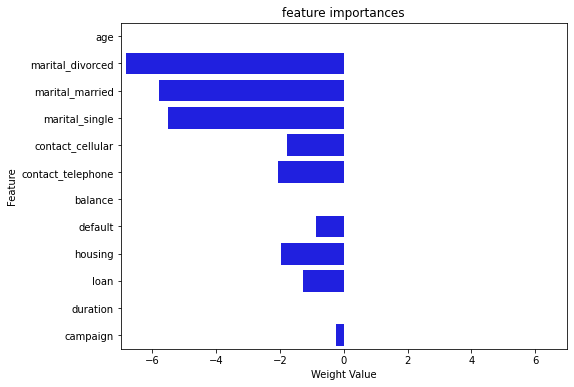

In [53]:
#feature_importance= feature_importance.sort_values(by = ['change_to_pred_value'], ascending=False)
#plot feature importance
fig, axes=plt.subplots(figsize=(8,6))

sns.barplot(x='weight_value', y='feature', data=feature_importance, ax=axes, color='blue')

axes.set_xlabel('Weight Value')
axes.set_ylabel('Feature')
axes.set_title('feature importances')
axes.set_xlim(-7, 7)
plt.show()

In [54]:
feature_importance=pd.DataFrame(list(X.columns), columns=['feature'])
feature_importance['change_to_pred_value']=pow(math.e, w)

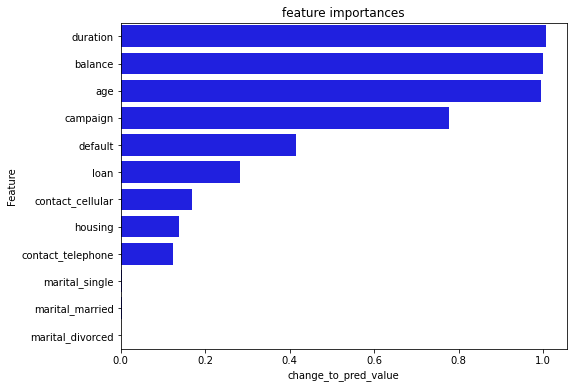

In [56]:
feature_importance= feature_importance.sort_values(by = ['change_to_pred_value'], ascending=False)
#plot feature importance
fig, axes=plt.subplots(figsize=(8,6))

sns.barplot(x='change_to_pred_value', y='feature', data=feature_importance, ax=axes, color='blue')

axes.set_xlabel('change_to_pred_value')
axes.set_ylabel('Feature')
axes.set_title('feature importances')
#axes.set_xlim(-7, 7)
plt.show()

## Percobaan 2

*Kombinasi Column: age, contact_cellular, contact_telephone, balance, default, housing, loan, duration, campaign*

### Split Feature and Target

In [57]:
#feature
X=df_after_preprocessed['age contact_cellular contact_telephone balance default housing loan duration campaign'.split()]
#target
y=df_after_preprocessed['y']

In [58]:
X.head()

,age,contact_cellular,contact_telephone,balance,default,housing,loan,duration,campaign
0,58,1,0,2143,0,1,0,261,1
1,44,1,0,29,0,1,0,151,1
2,33,1,0,2,0,1,1,76,1
3,47,1,0,1506,0,1,0,92,1
4,33,1,0,1,0,0,0,198,1


In [59]:
#Splitting the data into Train and Test 7:3
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 45)

### Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=46)
model.fit(X_train, y_train)

LogisticRegression(random_state=46)

### Prediction

In [61]:
#test prediction
y_pred = model.predict(X_test)

In [62]:
#train prediction
y_pred_train = model.predict(X_train)

### Evaluation

eval test model
Accuracy (Test Set): 0.83
Precision (Test Set): 0.77
Recall (Test Set): 0.70
F1-Score (Test Set): 0.73
AUC: 0.90
eval train model
Accuracy (Train Set): 0.83
Precision (Train Set): 0.77
Recall (Train Set): 0.69
F1-Score (Train Set): 0.73
AUC: 0.90


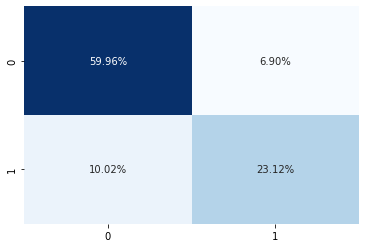

In [63]:
eval_classification(model, X_train, y_train, X_test, y_test)

### Tuning Hyperparameter

eval test model
Accuracy (Test Set): 0.83
Precision (Test Set): 0.78
Recall (Test Set): 0.69
F1-Score (Test Set): 0.73
AUC: 0.91
eval train model
Accuracy (Train Set): 0.83
Precision (Train Set): 0.78
Recall (Train Set): 0.68
F1-Score (Train Set): 0.72
AUC: 0.90


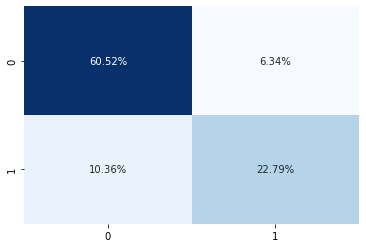

In [64]:
from sklearn.model_selection import RandomizedSearchCV
#hyperparameter tuning using randomized search

#penalty
penalty = ['l2','l1','elasticnet']
#C
C = [float(x) for x in np.linspace(0, 20, num=100)]
#max_iter
max_iter = [int(x) for x in np.linspace(0, 250, num=100)]

hyperparams = dict(penalty=penalty, C=C, max_iter=max_iter)

lr = LogisticRegression(random_state=46)
rs = RandomizedSearchCV(lr, hyperparams, cv=5, scoring='precision', random_state=46)
rs.fit(X_train, y_train)
eval_classification(rs, X_train, y_train, X_test, y_test)

In [65]:
print('Train score: ' + str(rs.score(X_train, y_train)))
print('Test score:' + str(rs.score(X_test, y_test)))

Train score: 0.7777556507019815
Test score:0.7824074074074074


In [66]:
rs.best_estimator_.get_params()

{'C': 10.303030303030303,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 209,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 46,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [70]:
c=rs.best_estimator_.get_params()['C']
maxiter=rs.best_estimator_.get_params()['max_iter']
maxiter

209

eval test model
Accuracy (Test Set): 0.83
Precision (Test Set): 0.78
Recall (Test Set): 0.69
F1-Score (Test Set): 0.73
AUC: 0.91
eval train model
Accuracy (Train Set): 0.83
Precision (Train Set): 0.78
Recall (Train Set): 0.68
F1-Score (Train Set): 0.72
AUC: 0.90


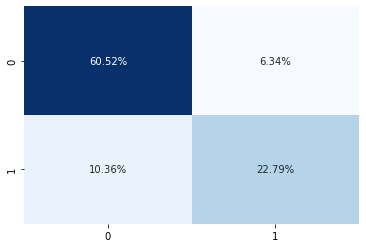

In [71]:
lr = LogisticRegression(random_state=45, C=c, max_iter=maxiter)
lr.fit(X_train, y_train)
eval_classification(lr, X_train, y_train, X_test, y_test)

In [72]:
list(X.columns)

['age',
 'contact_cellular',
 'contact_telephone',
 'balance',
 'default',
 'housing',
 'loan',
 'duration',
 'campaign']

In [73]:
w=lr.coef_[0]
w

array([-1.44093147e-02, -1.26874508e+00, -1.55854049e+00,  6.62498460e-05,
       -4.80558566e-01, -2.22846253e+00, -2.73058579e+00,  6.36119369e-03,
       -3.32772672e-01])

In [79]:
feature_importance=pd.DataFrame(list(X.columns), columns=['feature'])
feature_importance['weight_value']=w

In [80]:
feature_importance

,feature,weight_value
0,age,-0.014409
1,contact_cellular,-1.268745
2,contact_telephone,-1.558540
3,balance,0.000066
4,default,-0.480559
5,housing,-2.228463
6,loan,-2.730586
7,duration,0.006361
8,campaign,-0.332773


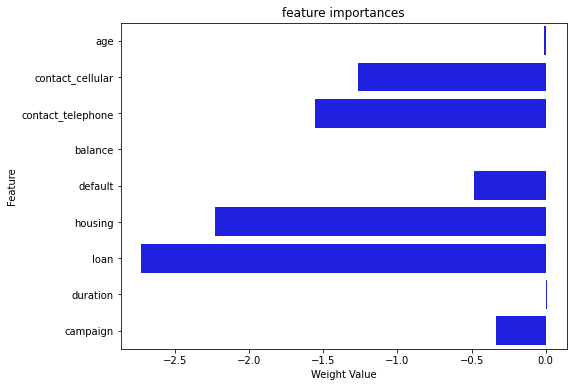

In [81]:
#feature_importance= feature_importance.sort_values(by = ['change_to_pred_value'], ascending=False)
#plot feature importance
fig, axes=plt.subplots(figsize=(8,6))

sns.barplot(x='weight_value', y='feature', data=feature_importance, ax=axes, color='blue')

axes.set_xlabel('Weight Value')
axes.set_ylabel('Feature')
axes.set_title('feature importances')
#axes.set_xlim(-7, 7)
plt.show()

In [82]:
feature_importance=pd.DataFrame(list(X.columns), columns=['feature'])
feature_importance['change_to_pred_value']=pow(math.e, w)

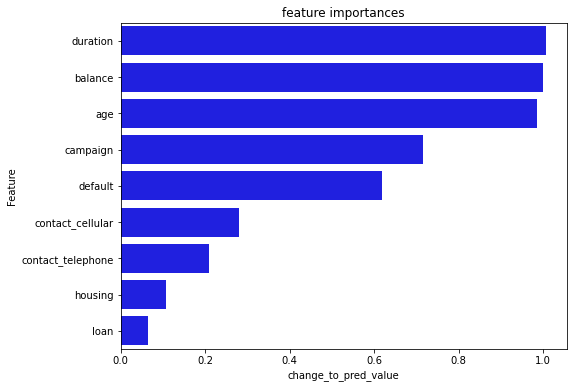

In [83]:
feature_importance= feature_importance.sort_values(by = ['change_to_pred_value'], ascending=False)
#plot feature importance
fig, axes=plt.subplots(figsize=(8,6))

sns.barplot(x='change_to_pred_value', y='feature', data=feature_importance, ax=axes, color='blue')

axes.set_xlabel('change_to_pred_value')
axes.set_ylabel('Feature')
axes.set_title('feature importances')
#axes.set_xlim(-7, 7)
plt.show()

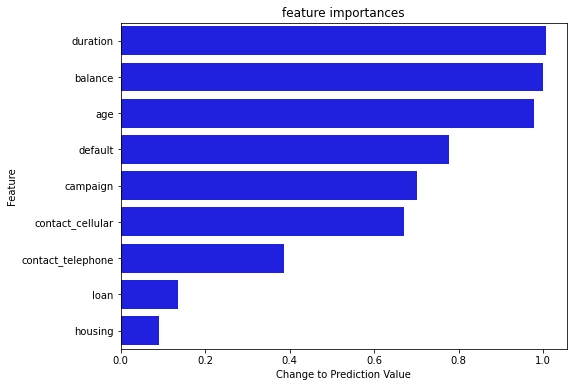

In [172]:
feature_importance= feature_importance.sort_values(by = ['change_to_pred_value'], ascending=False)
#plot feature importance
fig, axes=plt.subplots(figsize=(8,6))

sns.barplot(x='change_to_pred_value', y='feature', data=feature_importance, ax=axes, color='blue')

axes.set_xlabel('Change to Prediction Value')
axes.set_ylabel('Feature')
axes.set_title('feature importances')

plt.show()

## Percobaan 3

*Kombinasi Column: age, contact_cellular, contact_telephone, balance, default, housing, loan, duration, campaign marital_divorced marital_married marital_single*

### Split Feature and Target

In [84]:
df_after_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49441 entries, 0 to 49440
Data columns (total 53 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  49441 non-null  int64  
 1   default              49441 non-null  int64  
 2   balance              49441 non-null  int64  
 3   housing              49441 non-null  int64  
 4   loan                 49441 non-null  int64  
 5   day                  49441 non-null  int64  
 6   duration             49441 non-null  int64  
 7   campaign             49441 non-null  int64  
 8   pdays                49441 non-null  int64  
 9   previous             49441 non-null  int64  
 10  age_norm             49441 non-null  float64
 11  balance_std          49441 non-null  float64
 12  day_norm             49441 non-null  float64
 13  duration_std         49441 non-null  float64
 14  campaign_std         49441 non-null  float64
 15  pdays_std            49441 non-null 

In [85]:
#feature
X=df_after_preprocessed['age_norm marital_divorced marital_married marital_single contact_cellular contact_telephone balance_std default housing loan duration_std campaign_std'.split()]
#target
y=df_after_preprocessed['y']

In [86]:
X.head()

,age_norm,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,balance_std,default,housing,loan,duration_std,campaign_std
0,0.740741,0,1,0,1,0,0.598899,0,1,0,0.127825,-0.7579
1,0.481481,0,0,1,1,0,-0.644742,0,1,0,-0.443222,-0.7579
2,0.277778,0,1,0,1,0,-0.660626,0,1,1,-0.832573,-0.7579
3,0.537037,0,1,0,1,0,0.224159,0,1,0,-0.749511,-0.7579
4,0.277778,0,0,1,1,0,-0.661214,0,0,0,-0.199229,-0.7579


In [87]:
#Splitting the data into Train and Test 7:3
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 45)

### Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=46)
model.fit(X_train, y_train)

LogisticRegression(random_state=46)

### Prediction

In [89]:
#test prediction
y_pred = model.predict(X_test)

In [90]:
#train prediction
y_pred_train = model.predict(X_train)

### Evaluation

eval test model
Accuracy (Test Set): 0.87
Precision (Test Set): 0.88
Recall (Test Set): 0.71
F1-Score (Test Set): 0.79
AUC: 0.94
eval train model
Accuracy (Train Set): 0.87
Precision (Train Set): 0.87
Recall (Train Set): 0.71
F1-Score (Train Set): 0.78
AUC: 0.94


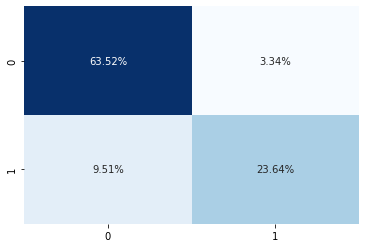

In [91]:
eval_classification(model, X_train, y_train, X_test, y_test)

### Tuning Hyperparameter

eval test model
Accuracy (Test Set): 0.87
Precision (Test Set): 0.88
Recall (Test Set): 0.71
F1-Score (Test Set): 0.79
AUC: 0.94
eval train model
Accuracy (Train Set): 0.87
Precision (Train Set): 0.87
Recall (Train Set): 0.71
F1-Score (Train Set): 0.78
AUC: 0.94


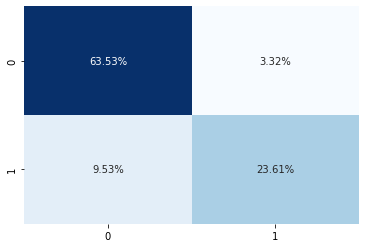

In [92]:
from sklearn.model_selection import RandomizedSearchCV
#hyperparameter tuning using randomized search

#penalty
penalty = ['l2','l1','elasticnet']
#C
C = [float(x) for x in np.linspace(0, 20, num=100)]
#max_iter
max_iter = [int(x) for x in np.linspace(0, 250, num=100)]

hyperparams = dict(penalty=penalty, C=C, max_iter=max_iter)

lr = LogisticRegression(random_state=46)
rs = RandomizedSearchCV(lr, hyperparams, cv=5, scoring='precision', random_state=46)
rs.fit(X_train, y_train)
eval_classification(rs, X_train, y_train, X_test, y_test)

In [93]:
print('Train score: ' + str(rs.score(X_train, y_train)))
print('Test score:' + str(rs.score(X_test, y_test)))

Train score: 0.8721700128150363
Test score:0.8765957446808511


In [94]:
rs.best_estimator_.get_params()

{'C': 10.303030303030303,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 209,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 46,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [95]:
c=rs.best_estimator_.get_params()['C']
maxiter=rs.best_estimator_.get_params()['max_iter']
maxiter

209

eval test model
Accuracy (Test Set): 0.87
Precision (Test Set): 0.88
Recall (Test Set): 0.71
F1-Score (Test Set): 0.79
AUC: 0.94
eval train model
Accuracy (Train Set): 0.87
Precision (Train Set): 0.87
Recall (Train Set): 0.71
F1-Score (Train Set): 0.78
AUC: 0.94


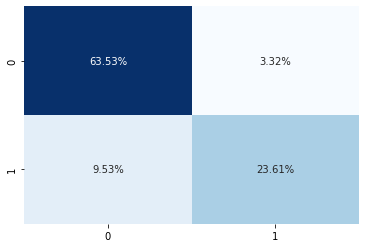

In [96]:
lr = LogisticRegression(random_state=45, C=c, max_iter=maxiter)
lr.fit(X_train, y_train)
eval_classification(lr, X_train, y_train, X_test, y_test)

In [97]:
list(X.columns)

['age_norm',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'contact_cellular',
 'contact_telephone',
 'balance_std',
 'default',
 'housing',
 'loan',
 'duration_std',
 'campaign_std']

In [98]:
w=lr.coef_[0]
w

array([-0.49881283, -8.68266643, -8.28512476, -7.92481921, -6.58276312,
       -7.153078  ,  0.08573473, -0.81237607, -1.98908942, -1.52965042,
        1.07849285, -0.39582438])

In [99]:
feature_importance=pd.DataFrame(list(X.columns), columns=['feature'])
feature_importance['weight_value']=w

In [100]:
feature_importance

,feature,weight_value
0,age_norm,-0.498813
1,marital_divorced,-8.682666
2,marital_married,-8.285125
3,marital_single,-7.924819
4,contact_cellular,-6.582763
5,contact_telephone,-7.153078
6,balance_std,0.085735
7,default,-0.812376
8,housing,-1.989089
9,loan,-1.529650


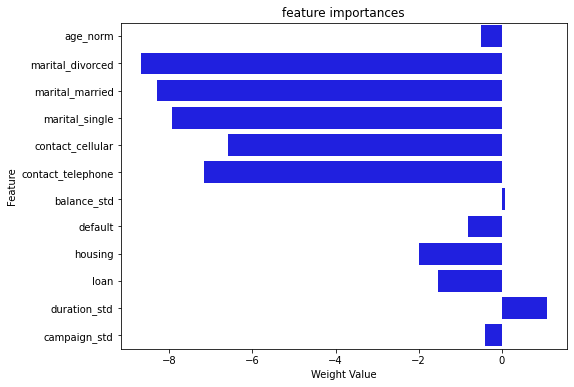

In [101]:
#feature_importance= feature_importance.sort_values(by = ['change_to_pred_value'], ascending=False)
#plot feature importance
fig, axes=plt.subplots(figsize=(8,6))

sns.barplot(x='weight_value', y='feature', data=feature_importance, ax=axes, color='blue')

axes.set_xlabel('Weight Value')
axes.set_ylabel('Feature')
axes.set_title('feature importances')
#axes.set_xlim(-7, 7)
plt.show()

In [102]:
feature_importance=pd.DataFrame(list(X.columns), columns=['feature'])
feature_importance['change_to_pred_value']=pow(math.e, w)

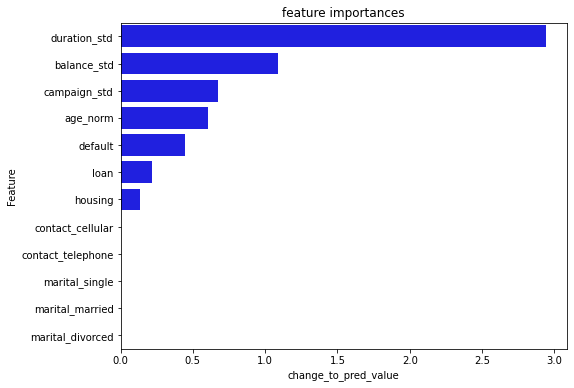

In [103]:
feature_importance= feature_importance.sort_values(by = ['change_to_pred_value'], ascending=False)
#plot feature importance
fig, axes=plt.subplots(figsize=(8,6))

sns.barplot(x='change_to_pred_value', y='feature', data=feature_importance, ax=axes, color='blue')

axes.set_xlabel('change_to_pred_value')
axes.set_ylabel('Feature')
axes.set_title('feature importances')
#axes.set_xlim(-7, 7)
plt.show()

## Percobaan 4

*Kombinasi Column: age, balance, default, housing, loan, duration, campaign*

### Split Feature and Target

In [104]:
df_after_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49441 entries, 0 to 49440
Data columns (total 53 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  49441 non-null  int64  
 1   default              49441 non-null  int64  
 2   balance              49441 non-null  int64  
 3   housing              49441 non-null  int64  
 4   loan                 49441 non-null  int64  
 5   day                  49441 non-null  int64  
 6   duration             49441 non-null  int64  
 7   campaign             49441 non-null  int64  
 8   pdays                49441 non-null  int64  
 9   previous             49441 non-null  int64  
 10  age_norm             49441 non-null  float64
 11  balance_std          49441 non-null  float64
 12  day_norm             49441 non-null  float64
 13  duration_std         49441 non-null  float64
 14  campaign_std         49441 non-null  float64
 15  pdays_std            49441 non-null 

In [105]:
#feature
X=df_after_preprocessed['age_norm balance_std default housing loan duration_std campaign_std'.split()]
#target
y=df_after_preprocessed['y']

In [106]:
X.head()

,age_norm,balance_std,default,housing,loan,duration_std,campaign_std
0,0.740741,0.598899,0,1,0,0.127825,-0.7579
1,0.481481,-0.644742,0,1,0,-0.443222,-0.7579
2,0.277778,-0.660626,0,1,1,-0.832573,-0.7579
3,0.537037,0.224159,0,1,0,-0.749511,-0.7579
4,0.277778,-0.661214,0,0,0,-0.199229,-0.7579


In [107]:
#Splitting the data into Train and Test 7:3
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 45)

### Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=46)
model.fit(X_train, y_train)

LogisticRegression(random_state=46)

### Prediction

In [109]:
#test prediction
y_pred = model.predict(X_test)

In [110]:
#train prediction
y_pred_train = model.predict(X_train)

### Evaluation

eval test model
Accuracy (Test Set): 0.82
Precision (Test Set): 0.76
Recall (Test Set): 0.67
F1-Score (Test Set): 0.71
AUC: 0.90
eval train model
Accuracy (Train Set): 0.81
Precision (Train Set): 0.75
Recall (Train Set): 0.65
F1-Score (Train Set): 0.70
AUC: 0.89


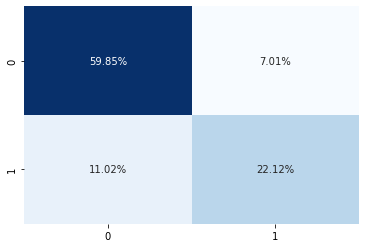

In [111]:
eval_classification(model, X_train, y_train, X_test, y_test)

### Tuning Hyperparameter

eval test model
Accuracy (Test Set): 0.82
Precision (Test Set): 0.76
Recall (Test Set): 0.67
F1-Score (Test Set): 0.71
AUC: 0.90
eval train model
Accuracy (Train Set): 0.81
Precision (Train Set): 0.75
Recall (Train Set): 0.65
F1-Score (Train Set): 0.70
AUC: 0.89


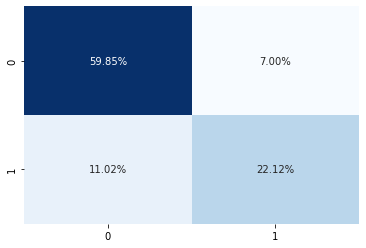

In [112]:
from sklearn.model_selection import RandomizedSearchCV
#hyperparameter tuning using randomized search

#penalty
penalty = ['l2','l1','elasticnet']
#C
C = [float(x) for x in np.linspace(0, 20, num=100)]
#max_iter
max_iter = [int(x) for x in np.linspace(0, 250, num=100)]

hyperparams = dict(penalty=penalty, C=C, max_iter=max_iter)

lr = LogisticRegression(random_state=46)
rs = RandomizedSearchCV(lr, hyperparams, cv=5, scoring='precision', random_state=46)
rs.fit(X_train, y_train)
eval_classification(rs, X_train, y_train, X_test, y_test)

In [113]:
print('Train score: ' + str(rs.score(X_train, y_train)))
print('Test score:' + str(rs.score(X_test, y_test)))

Train score: 0.7543172690763053
Test score:0.7594907407407407


In [114]:
rs.best_estimator_.get_params()

{'C': 3.6363636363636362,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 30,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 46,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [115]:
c=rs.best_estimator_.get_params()['C']
maxiter=rs.best_estimator_.get_params()['max_iter']
maxiter

30

eval test model
Accuracy (Test Set): 0.82
Precision (Test Set): 0.76
Recall (Test Set): 0.67
F1-Score (Test Set): 0.71
AUC: 0.90
eval train model
Accuracy (Train Set): 0.81
Precision (Train Set): 0.75
Recall (Train Set): 0.65
F1-Score (Train Set): 0.70
AUC: 0.89


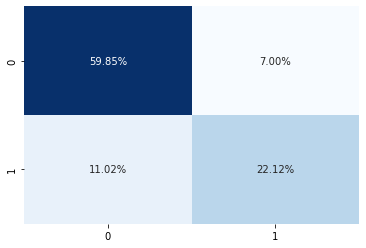

In [116]:
lr = LogisticRegression(random_state=45, C=c, max_iter=maxiter)
lr.fit(X_train, y_train)
eval_classification(lr, X_train, y_train, X_test, y_test)

In [117]:
list(X.columns)

['age_norm',
 'balance_std',
 'default',
 'housing',
 'loan',
 'duration_std',
 'campaign_std']

In [118]:
w=lr.coef_[0]
w

array([-1.16023069,  0.11840659, -1.08489878, -2.35854061, -2.1166521 ,
        1.18817039, -0.46046733])

In [119]:
feature_importance=pd.DataFrame(list(X.columns), columns=['feature'])
feature_importance['weight_value']=w

In [120]:
feature_importance

,feature,weight_value
0,age_norm,-1.160231
1,balance_std,0.118407
2,default,-1.084899
3,housing,-2.358541
4,loan,-2.116652
5,duration_std,1.188170
6,campaign_std,-0.460467


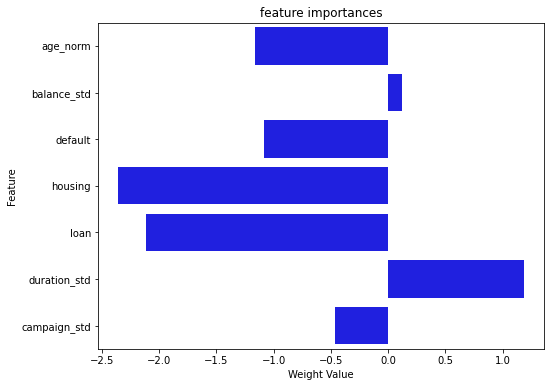

In [121]:
#feature_importance= feature_importance.sort_values(by = ['change_to_pred_value'], ascending=False)
#plot feature importance
fig, axes=plt.subplots(figsize=(8,6))

sns.barplot(x='weight_value', y='feature', data=feature_importance, ax=axes, color='blue')

axes.set_xlabel('Weight Value')
axes.set_ylabel('Feature')
axes.set_title('feature importances')
#axes.set_xlim(-7, 7)
plt.show()

In [122]:
feature_importance=pd.DataFrame(list(X.columns), columns=['feature'])
feature_importance['change_to_pred_value']=pow(math.e, w)

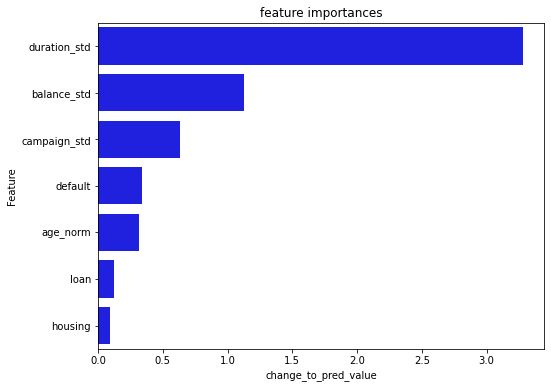

In [123]:
feature_importance= feature_importance.sort_values(by = ['change_to_pred_value'], ascending=False)
#plot feature importance
fig, axes=plt.subplots(figsize=(8,6))

sns.barplot(x='change_to_pred_value', y='feature', data=feature_importance, ax=axes, color='blue')

axes.set_xlabel('change_to_pred_value')
axes.set_ylabel('Feature')
axes.set_title('feature importances')
#axes.set_xlim(-7, 7)
plt.show()